<a href="https://colab.research.google.com/github/DataNerd231/Python_Tutorials/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset into colab**

In [48]:
from google.colab import files
files.upload()

Saving churn_prediction.csv to churn_prediction (1).csv


{'churn_prediction.csv': b'customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn\r\n1,3135,66,Male,0,self_employed,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.2,0.2,0.2,0.2,1458.71,1458.71,0\r\n2,310,35,Male,0,self_employed,,2,3214,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0\r\n4,2356,31,Male,0,salaried,146,2,41,,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0\r\n5,478,90,,,self_employed,1020,2,582,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1\r\n6,2531,42,Male,2,self_employed,1494,3,388,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1\r\n7,263,42,Female,0,self_e

**Loading packages needed for EDA**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df = pd.read_csv("churn_prediction.csv")

print(df.shape)
print(df.columns)

(28382, 21)
Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')


**Checking the content of he first two rows**

In [51]:
df.iloc[1:3, : ]

customer_id  vintage  ...  previous_month_balance churn
1            2      310  ...                 8787.61     0
2            4     2356  ...                 5070.14     0

[2 rows x 21 columns]

**Target Exploration**

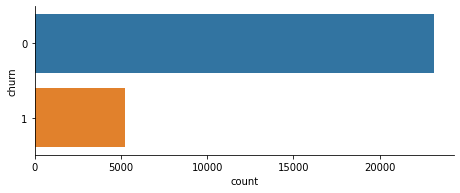

In [52]:
distr_of_target_variable = sns.catplot(y="churn", kind="count", data=df, height=2.6, aspect= 2.5, orient="h")

In [53]:
df['churn'].value_counts(normalize = True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

**Numerical Features**

In [54]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [55]:
numerical_cols = ['customer_id','vintage','age','dependents','customer_nw_category','days_since_last_transaction','current_balance','previous_month_end_balance','average_monthly_balance_prevQ',
                  'average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','previous_month_balance']

In [56]:
df[numerical_cols].describe()

customer_id  ...  previous_month_balance
count  28382.000000  ...            2.838200e+04
mean   15143.508667  ...            7.495177e+03
std     8746.454456  ...            4.243198e+04
min        1.000000  ...           -5.171920e+03
25%     7557.250000  ...            2.074408e+03
50%    15150.500000  ...            3.465235e+03
75%    22706.750000  ...            6.654693e+03
max    30301.000000  ...            5.720144e+06

[8 rows x 16 columns]

In [57]:
df[numerical_cols].mean()

customer_id                       15143.508667
vintage                            2364.336446
age                                  48.208336
dependents                            0.347236
customer_nw_category                  2.225530
days_since_last_transaction          69.997814
current_balance                    7380.551804
previous_month_end_balance         7495.770548
average_monthly_balance_prevQ      7496.779856
average_monthly_balance_prevQ2     7124.209162
current_month_credit               3433.252240
previous_month_credit              3261.694458
current_month_debit                3658.744549
previous_month_debit               3339.761353
current_month_balance              7451.132765
previous_month_balance             7495.177129
dtype: float64

**Checking the customer net worth category & Balance features using the Mean function**

In [58]:
cols = ['current_balance','previous_month_end_balance','current_month_balance','previous_month_balance']
df.groupby(['customer_nw_category'])[cols].mean()

current_balance  ...  previous_month_balance
customer_nw_category                   ...                        
1                        12883.682913  ...            13242.281037
2                         7773.279345  ...             7794.672359
3                         4795.520175  ...             4954.843500

[3 rows x 4 columns]

**Draw the boxplot for each numerical vairable of the balance features**

In [59]:
bal_cols = df[cols]

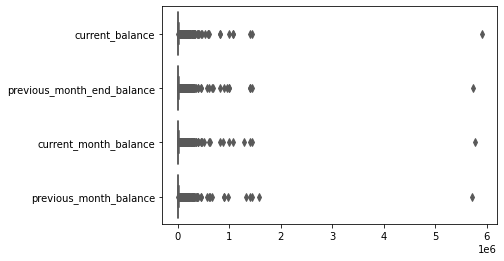

In [60]:
box_plot_visual = sns.boxplot(data=bal_cols, orient='h', palette="Set2")

**Looking at the balance feature and why there is need for feature transformation**


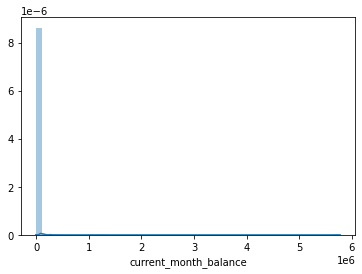

In [61]:
sns.distplot(df["current_month_balance"])
plt.show()

In [62]:
#Transforming the balance Features using log transform 
df1 = pd.DataFrame()

for i in bal_cols:
  df1[str('log_') + i] = np.log(df[i] + 6000)

log_bal_cols = df1.columns

print(df1)

       log_current_balance  ...  log_previous_month_balance
0                 8.917138  ...                    8.917138
1                 9.340524  ...                    9.601545
2                 9.201618  ...                    9.312007
3                 9.023036  ...                    8.945045
4                 8.843286  ...                    8.946005
...                    ...  ...                         ...
28377             8.864525  ...                    8.864525
28378             9.194628  ...                    9.178883
28379            11.177620  ...                   11.059806
28380             8.939260  ...                    8.939260
28381             9.000489  ...                    9.133522

[28382 rows x 4 columns]


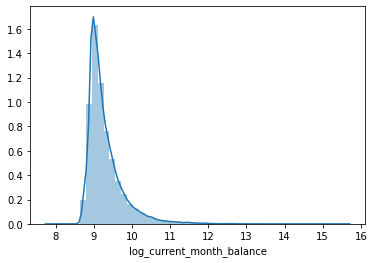

In [63]:
sns.distplot(df1["log_current_month_balance"])
plt.show()

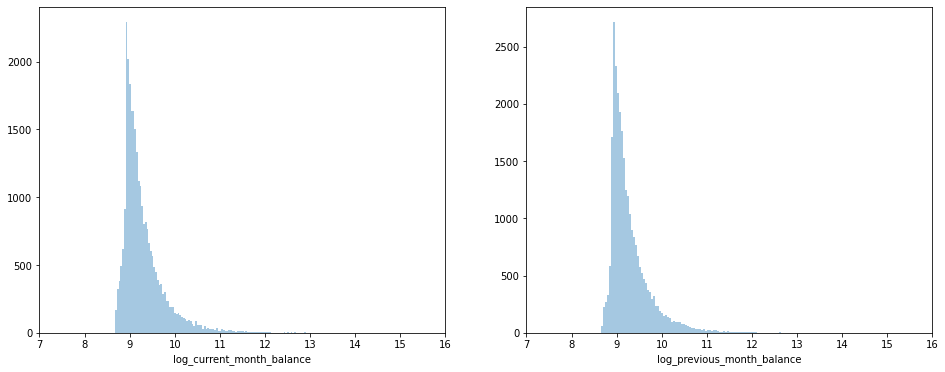

In [64]:
# Plotting other attributes (comparing current_month_balance vs previous month balance)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
#current month average balance
ax1.set_xlim(xmin, xmax)
ax1.set(xlabel='log of average balance of current month')
sns.distplot(df1["log_current_month_balance"], kde=False, bins=200, ax=ax1)

#previous month average balance
ax2.set_xlim(xmin, xmax)
ax2.set(xlabel='log of average balance of previous month')
sns.distplot(df1["log_previous_month_balance"], kde=False, bins=200, ax=ax2)

plt.show()

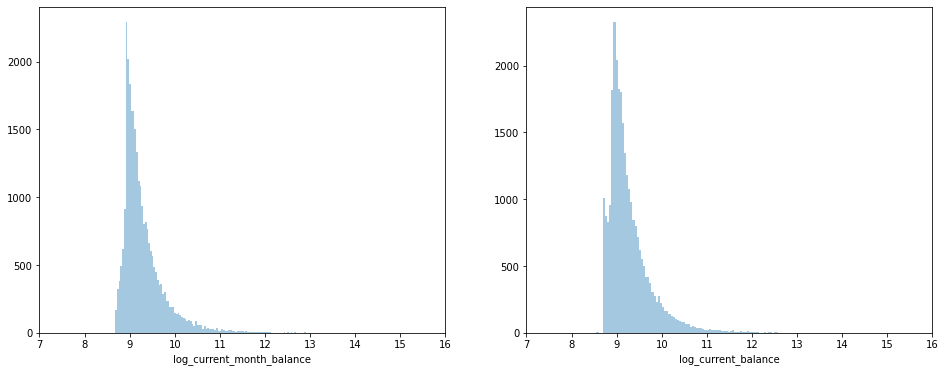

In [65]:
# Plotting other attributes (comparing current_month_balance vs end of month current balance)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
#current month average balance
ax1.set_xlim(xmin, xmax)
ax1.set(xlabel='log of average balance of current month')
sns.distplot(df1["log_current_month_balance"], kde=False, bins=200, ax=ax1)

#current end of  month  balance
ax2.set_xlim(xmin, xmax)
ax2.set(xlabel='log of month end balance')
sns.distplot(df1["log_current_balance"], kde=False, bins=200, ax=ax2)

plt.show()

**Bivariate Analysis**

Take in churn Variable to transformed DF1 dataset

In [66]:
df1['churn'] = df['churn']

df1

log_current_balance  ...  churn
0                 8.917138  ...      0
1                 9.340524  ...      0
2                 9.201618  ...      0
3                 9.023036  ...      1
4                 8.843286  ...      1
...                    ...  ...    ...
28377             8.864525  ...      0
28378             9.194628  ...      0
28379            11.177620  ...      1
28380             8.939260  ...      0
28381             9.000489  ...      1

[28382 rows x 5 columns]

**Using Pairplot to display the relationship of numerical columns with the target variable**

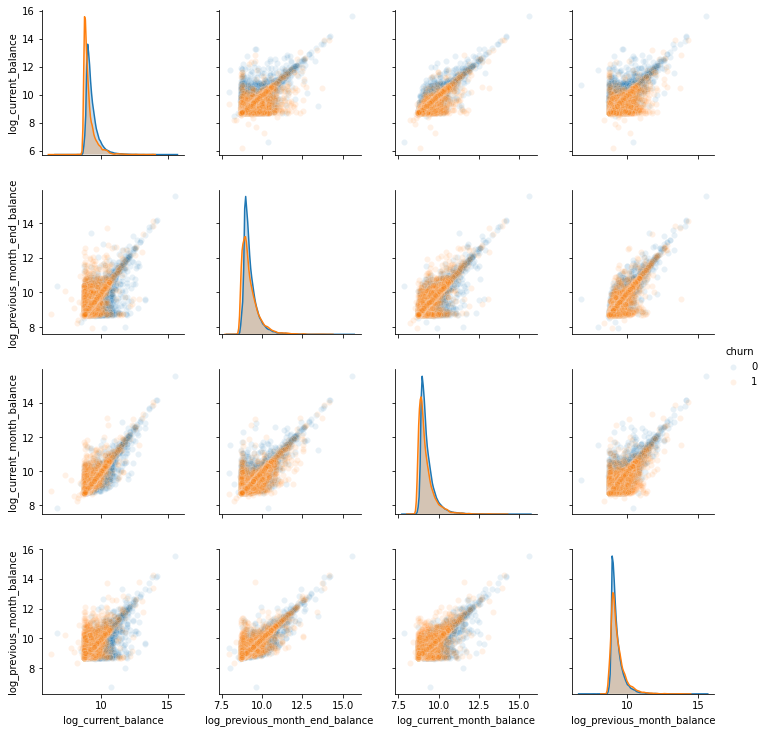

In [67]:
sns.pairplot(df1, vars=log_bal_cols, hue='churn', plot_kws={'alpha': 0.1})
plt.show()

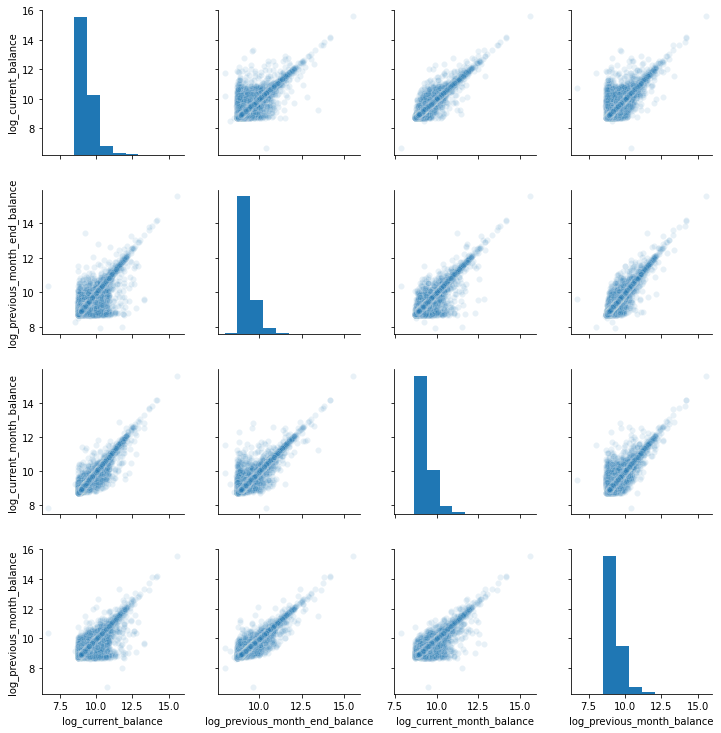

In [68]:
#separting the churn category features with the numerical variables 
df1_no_churn = df1[df1['churn']==0]
sns.pairplot(df1_no_churn, vars=log_bal_cols, plot_kws={'alpha': 0.1})
plt.show()

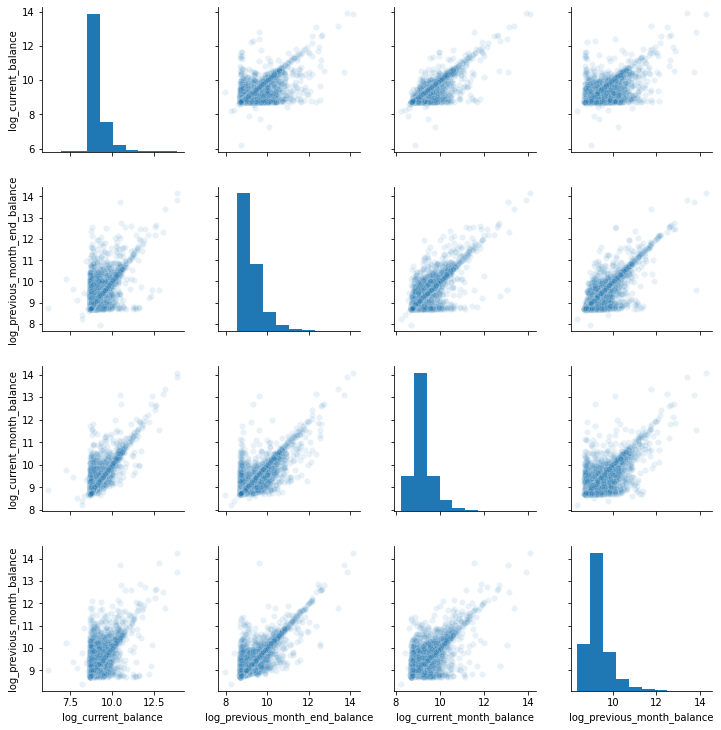

In [69]:
#separting the churn category features with the numerical variables 
df1_churn = df1[df1['churn']==1]
sns.pairplot(df1_churn, vars=log_bal_cols, plot_kws={'alpha': 0.1})
plt.show()

**Looking at Credit and Debit Features**

In [70]:
cr_dr_cols=['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']
df2 = pd.DataFrame()

for i in cr_dr_cols:
  df2[str('log_')+i] = np.log(df[i])

log_cr_dr_cols = df2.columns

df2['churn'] = df['churn']


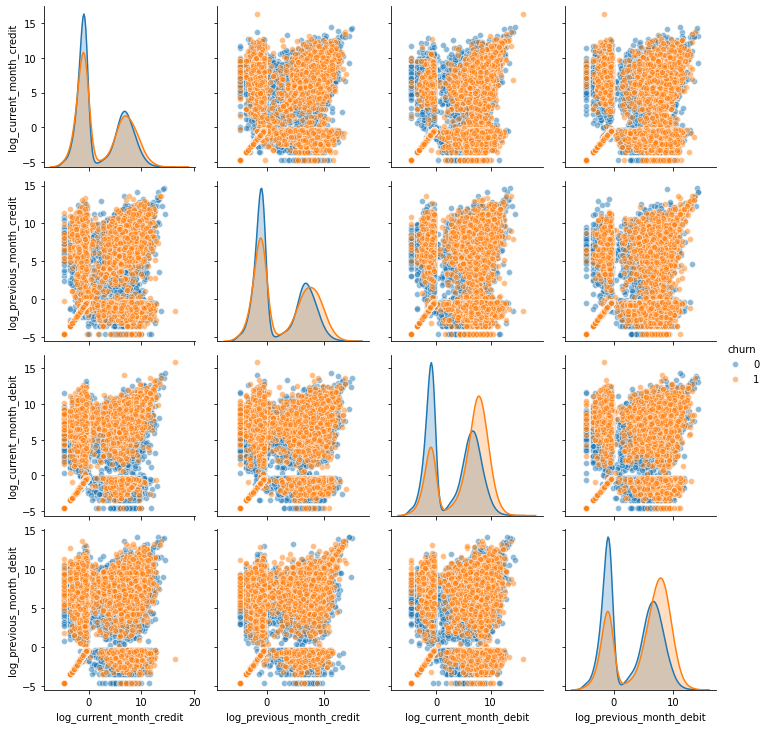

In [71]:
#Pairplot for churn and features variable 
sns.pairplot(df2, vars=log_cr_dr_cols, hue='churn', plot_kws={'alpha': 0.5})
plt.show()

**Looking at the average monthly balance for previous Qtr and Previous Qtr2**

In [72]:
qtr_cols=['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']

df3 = pd.DataFrame() 

for i in qtr_cols:
  df3[str('log_')+i] = np.log(df[i] + 17000)

log_qtr_cols = df3.columns

df3['churn'] = df['churn']

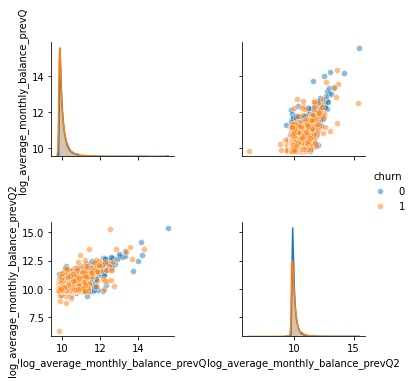

In [73]:
#Pairplot for churn and features variable 
sns.pairplot(df3, vars=log_qtr_cols, hue='churn', plot_kws={'alpha': 0.5})
plt.show()

In [74]:
# Removing 1st and 99th percentile and plot 
df4 = df[['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']]

low= 0.01
high= 0.99

quant_df = df4.quantile([low, high])
print(quant_df)

df5 = df4.apply(lambda x: x[(x>quant_df.loc[low, x.name]) & (x<quant_df.loc[high, x.name])], axis=0)

      average_monthly_balance_prevQ  average_monthly_balance_prevQ2
0.01                      1449.0377                        121.6485
0.99                     60118.2288                      59357.8810


In [75]:
qtr_cols=['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']

df3 = pd.DataFrame() 

for i in qtr_cols:
  df3[str('log_')+i] = np.log(df5[i] + 17000)

log_qtr_cols = df3.columns

df3['churn'] = df['churn']

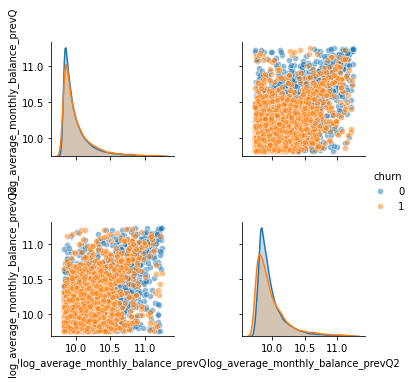

In [76]:
#Pairplot for churn and features variable 
sns.pairplot(df3, vars=log_qtr_cols, hue='churn', plot_kws={'alpha': 0.5})
plt.show()

**Demographic and Bank Related Information for customers (exploring other numerical and ordinal features)**

In [77]:
#KDE plot help to ignore missing values and aid smoothing for visualizations 
#(Days Since last Transaction)
def kdeplot(feature): 
  plt.figure(figsize=(9,4))
  plt.title("KDE Plot for {}".format(feature))
  ax0 = sns.kdeplot(df[df['churn']==0][feature].dropna(), color='blue', label= 'churn - 0')
  ax0 = sns.kdeplot(df[df['churn']==1][feature].dropna(), color='orange', label= 'churn - 1')


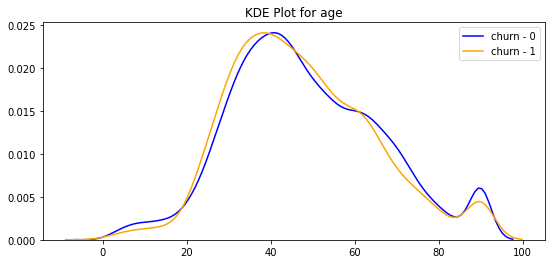

In [78]:
 kdeplot('age')

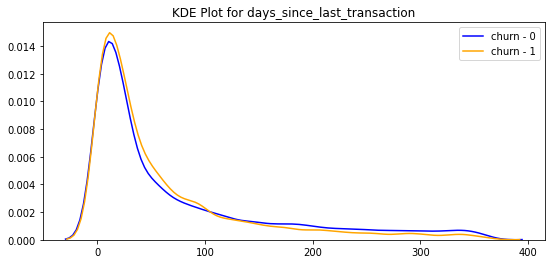

In [79]:
kdeplot('days_since_last_transaction')

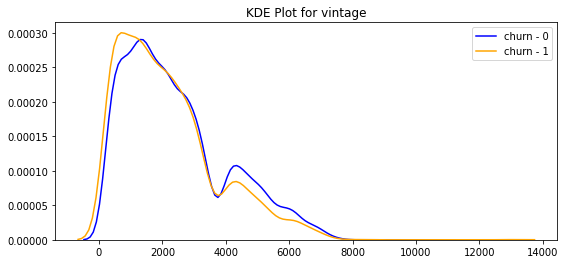

In [80]:
kdeplot('vintage')

**Categorical Features**

In [81]:
cat_cols = ['gender', 'occupation', 'city', 'branch_code']

for i in range(0, len(cat_cols)):
  print(str(cat_cols[i]) + "- Number of unique values: " + str(df[cat_cols[i]].nunique()))

gender- Number of unique values: 2
occupation- Number of unique values: 5
city- Number of unique values: 1604
branch_code- Number of unique values: 3185


**Univariate Analysis**

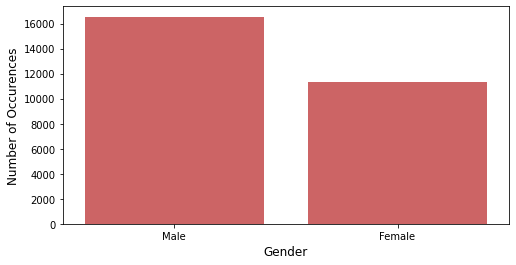

In [82]:
color = sns.color_palette()

int_level = df['gender'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha= 0.8, color=color[3])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

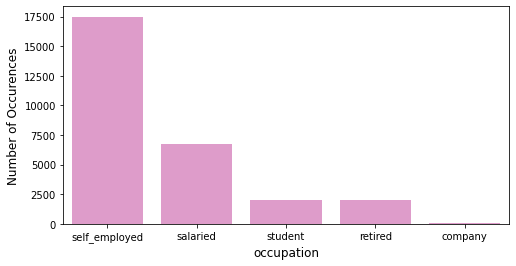

In [83]:
color = sns.color_palette()

int_level = df['occupation'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha= 0.8, color=color[6])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('occupation', fontsize=12)
plt.show()

**Bin-City Population**

In [84]:
#check for the Value count in the city variable 
df['city'].value_counts().head(20)

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
Name: city, dtype: int64

In [93]:
#convert city variable w.r.t degree of number of customers 
df['city_bin'] = df['city'].copy()
counts = df.city.value_counts()
df.city_bin[df['city'].isin(counts[counts > 900].index)] = 3
df.city_bin[df['city'].isin(counts[counts <= 900].index) & df['city_bin'].isin(counts[counts >= 350].index)] = 2 
df.city_bin[df['city'].isin(counts[counts < 350].index) & df['city_bin'].isin(counts[counts >= 100].index)] = 1
df.city_bin[df['city'].isin(counts[counts < 100].index)] = 0

df['city_bin'] = pd.to_numeric(df['city_bin'], errors= 'coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

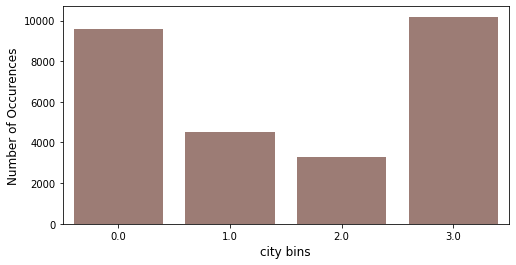

In [94]:
int_level = df['city_bin'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha= 0.8, color=color[5])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('city bins', fontsize=12)
plt.show()

In [98]:
# Repeat same for branch codes 
df['branch_bin'] = df['branch_code'].copy()
counts = df.branch_code.value_counts()
df.branch_bin[df['branch_code'].isin(counts[counts >= 100].index)] = 2
df.branch_bin[df['branch_code'].isin(counts[counts < 100].index) & df['branch_bin'].isin(counts[counts >= 50].index)] = 1 
df.branch_bin[df['branch_code'].isin(counts[counts < 50].index)] = 0

df['branch_bin'] = pd.to_numeric(df['branch_bin'], errors= 'coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


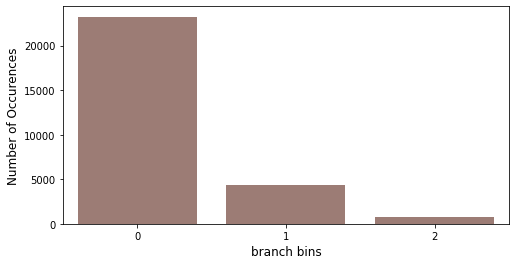

In [99]:
int_level = df['branch_bin'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha= 0.8, color=color[5])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('branch bins', fontsize=12)
plt.show()

**Bivariate Analysis**

In [100]:
#Using a function to compare churn rates for different catgories in each feature 
def barplot_percentages(feature): 
  ax1 = df.groupby(feature)['churn'].value_counts(normalize=True).unstack()
  ax1.plot(kind = 'bar', stacked='True')
  int_level = df[feature].value_counts()

  plt.figure(figsize=(8,4))
  sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[3])
  plt.ylabel('Number of Ocuurences', fontsize=12)
  plt.xlabel(str(feature), fontsize=12)
  plt.show()

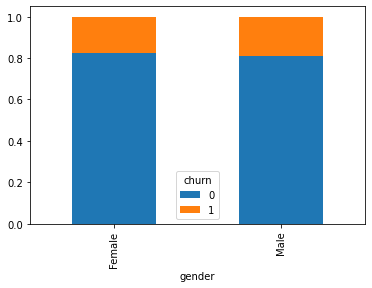

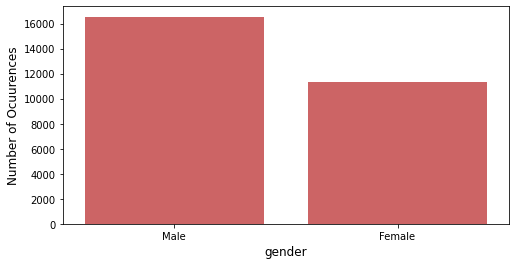

In [101]:
#Gender 
barplot_percentages("gender")

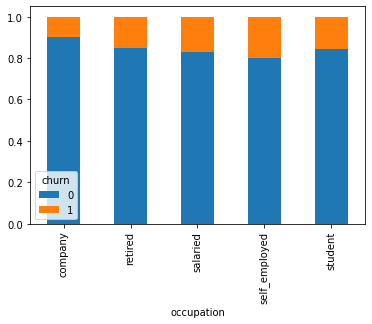

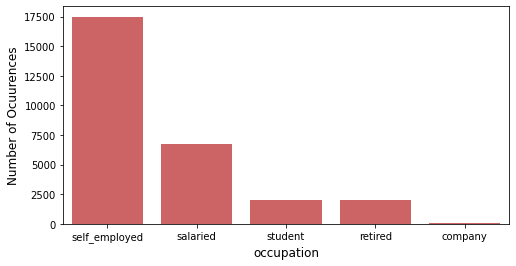

In [102]:
#Occupation
barplot_percentages("occupation")

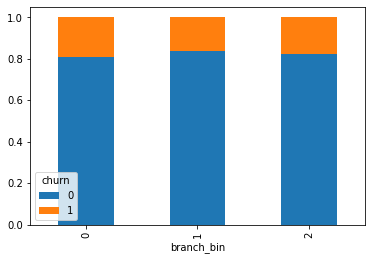

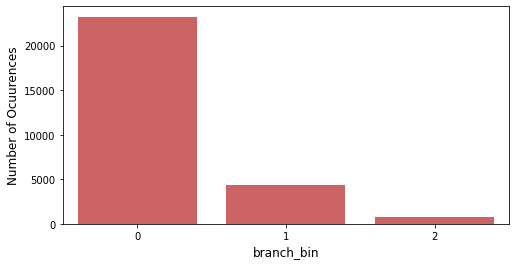

In [103]:
#branch_bins
barplot_percentages("branch_bin")

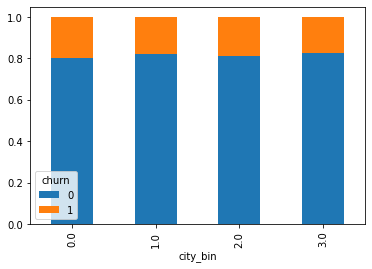

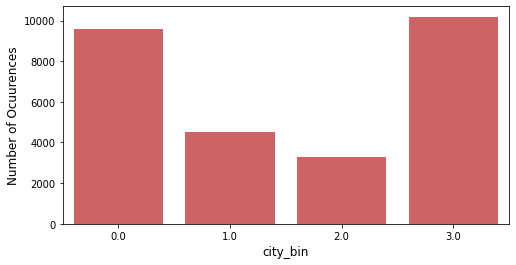

In [105]:
#city bins
barplot_percentages("city_bin")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


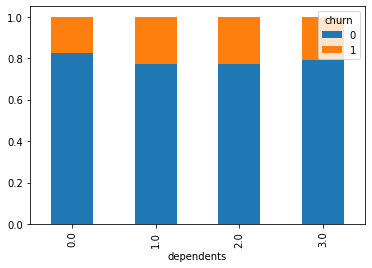

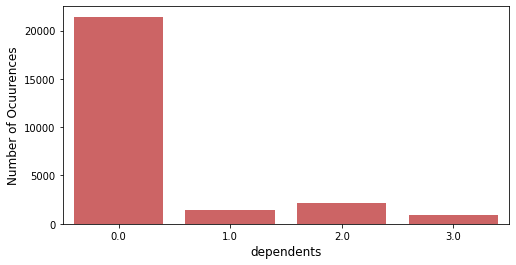

In [106]:
#dependents 

df['dependents'][df['dependents'] > 3] =3

barplot_percentages("dependents")

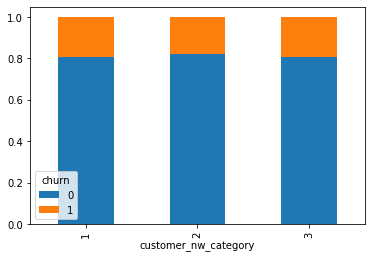

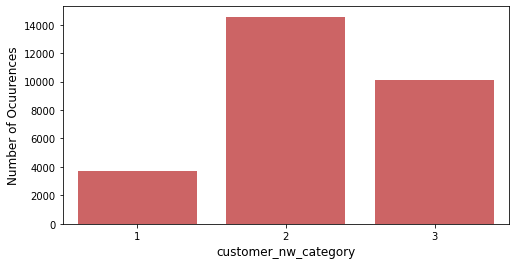

In [107]:
#customer Networth Category

barplot_percentages("customer_nw_category")

**Correlation Heatmap**

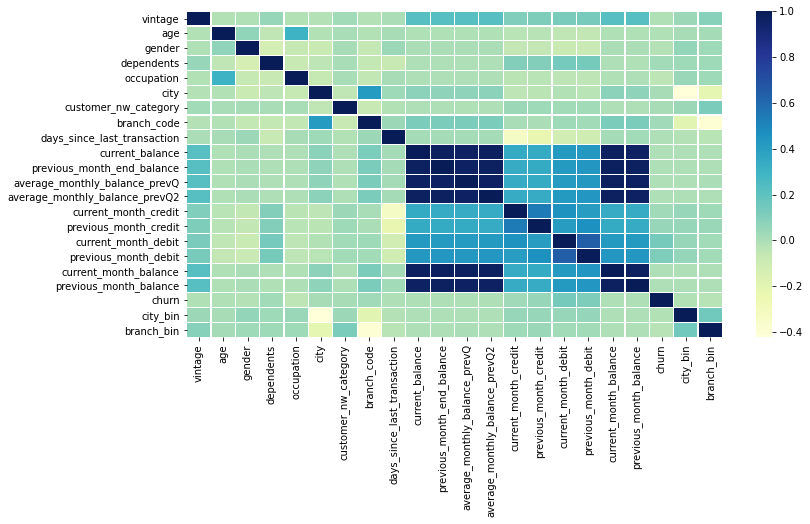

In [108]:
plt.figure(figsize=(12,6))
df.drop(["customer_id"], axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, cmap='YlGnBu')